<a href="https://colab.research.google.com/github/Salma-Kassem/optmization_techniques/blob/main/optmization2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
sheet_id = "1tCD9oS9iHd86CyriAjC9Aqoi6ymECeph1fO2UGALaFo"
sheet_name = "global_cancer_patients_2015_2024"  # Or your specific sheet name
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(csv_url)
df.head()  # Display first few rows



,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Separate target and features
target_col = 'Target_Severity_Score'
# Drop rows with missing target (optional, depending on use case)
df = df.dropna(subset=[target_col])

# Identify numerical columns except target
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove(target_col)

# Apply MinMaxScaler to all numerical columns except target
minmax_scaler = MinMaxScaler()
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

# Apply StandardScaler to target column
standard_scaler = StandardScaler()
df[[target_col]] = standard_scaler.fit_transform(df[[target_col]])

print(df.head())


  Patient_ID       Age  Gender Country_Region      Year  Genetic_Risk  \
0  PT0000000  0.739130    Male             UK  0.666667          0.64   
1  PT0000001  0.202899    Male          China  0.666667          0.13   
2  PT0000002  0.869565    Male       Pakistan  0.888889          0.74   
3  PT0000003  0.289855    Male             UK  0.000000          0.17   
4  PT0000004  0.333333  Female         Brazil  0.222222          0.51   

   Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0           0.28         0.95     0.09           0.87        Lung   
1           0.45         0.37     0.39           0.63    Leukemia   
2           0.79         0.24     0.47           0.01      Breast   
3           0.29         0.48     0.35           0.27       Colon   
4           0.28         0.23     0.67           0.05        Skin   

  Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0    Stage III            0.609616            0.59              -0.026

In [ ]:
import pandas as pd

# Assuming Patient_ID is like 'ID101', 'ID102', etc.
# Extract numeric part and convert to int
df['Patient_ID'] = df['Patient_ID'].str[2:].astype(int)

# Optional: rename it for clarity
df.rename(columns={'Patient_ID': 'Patient_ID_int'}, inplace=True)

# Check result
df.head()


,Patient_ID_int,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,0,0.739130,Male,UK,0.666667,0.64,0.28,0.95,0.09,0.87,Lung,Stage III,0.609616,0.59,-0.026013
1,1,0.202899,Male,China,0.666667,0.13,0.45,0.37,0.39,0.63,Leukemia,Stage 0,0.079720,0.47,-0.251076
2,2,0.869565,Male,Pakistan,0.888889,0.74,0.79,0.24,0.47,0.01,Breast,Stage II,0.020887,0.71,0.740867
3,3,0.289855,Male,UK,0.000000,0.17,0.29,0.48,0.35,0.27,Colon,Stage I,0.657330,0.16,-1.526433
4,4,0.333333,Female,Brazil,0.222222,0.51,0.28,0.23,0.67,0.05,Skin,Stage III,0.768181,0.29,-1.109649


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cancer_Stage'] = le.fit_transform(df['Cancer_Stage'])
df.head()


,Patient_ID_int,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,0,0.739130,Male,UK,0.666667,0.64,0.28,0.95,0.09,0.87,Lung,3,0.609616,0.59,-0.026013
1,1,0.202899,Male,China,0.666667,0.13,0.45,0.37,0.39,0.63,Leukemia,0,0.079720,0.47,-0.251076
2,2,0.869565,Male,Pakistan,0.888889,0.74,0.79,0.24,0.47,0.01,Breast,2,0.020887,0.71,0.740867
3,3,0.289855,Male,UK,0.000000,0.17,0.29,0.48,0.35,0.27,Colon,1,0.657330,0.16,-1.526433
4,4,0.333333,Female,Brazil,0.222222,0.51,0.28,0.23,0.67,0.05,Skin,3,0.768181,0.29,-1.109649


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Non-ordinal categorical columns
non_ordinal_cols = ['Gender', 'Country_Region', 'Cancer_Type']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the data
encoded_array = encoder.fit_transform(df[non_ordinal_cols])

# Get new column names
encoded_cols = encoder.get_feature_names_out(non_ordinal_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original columns and concatenate encoded ones
df = pd.concat([df.drop(columns=non_ordinal_cols), encoded_df], axis=1)

# Done
print(df.head())


   Patient_ID_int       Age      Year  Genetic_Risk  Air_Pollution  \
0               0  0.739130  0.666667          0.64           0.28   
1               1  0.202899  0.666667          0.13           0.45   
2               2  0.869565  0.888889          0.74           0.79   
3               3  0.289855  0.000000          0.17           0.29   
4               4  0.333333  0.222222          0.51           0.28   

   Alcohol_Use  Smoking  Obesity_Level  Cancer_Stage  Treatment_Cost_USD  ...  \
0         0.95     0.09           0.87             3            0.609616  ...   
1         0.37     0.39           0.63             0            0.079720  ...   
2         0.24     0.47           0.01             2            0.020887  ...   
3         0.48     0.35           0.27             1            0.657330  ...   
4         0.23     0.67           0.05             3            0.768181  ...   

   Country_Region_UK  Country_Region_USA  Cancer_Type_Breast  \
0                1.0        

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score', 'Patient_ID_int'])  # drop targets + ID
y = df[['Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']]
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)


In [ ]:
def weighted_mse(y_true, y_pred):
    weights = tf.constant([0.2, 0.4, 0.4])  # Adjust as needed
    return tf.reduce_mean(weights * tf.square(y_true - y_pred), axis=-1)

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import MeanSquaredError

def build_model(optimizer):
    model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    Dropout(0.2),

 Dense(3)
])
    model.compile(optimizer=optimizer,loss=weighted_mse, metrics=['mse'])
    return model

In [ ]:
import matplotlib.pyplot as plt
sgd=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9,nesterov=True)
model_sgd = build_model(sgd)
history_sgd = model_sgd.fit(X_train, y_train, batch_size = 32 ,validation_data=(X_test,y_test), epochs=50, verbose=1)






Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.3006 - mse: 0.7766 - val_loss: 0.0592 - val_mse: 0.1621
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0678 - mse: 0.1834 - val_loss: 0.0480 - val_mse: 0.1341
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0632 - mse: 0.1720 - val_loss: 0.0490 - val_mse: 0.1367
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0614 - mse: 0.1675 - val_loss: 0.0481 - val_mse: 0.1344
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0595 - mse: 0.1625 - val_loss: 0.0462 - val_mse: 0.1296
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0594 - mse: 0.1624 - val_loss: 0.0475 - val_mse: 0.1330
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0581 - mse: 0.1591 - val_loss: 0.0475 - val_mse: 0.1329
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0582 - mse: 0.1594 - val_loss: 0.0471 - val_mse: 0.1318
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/

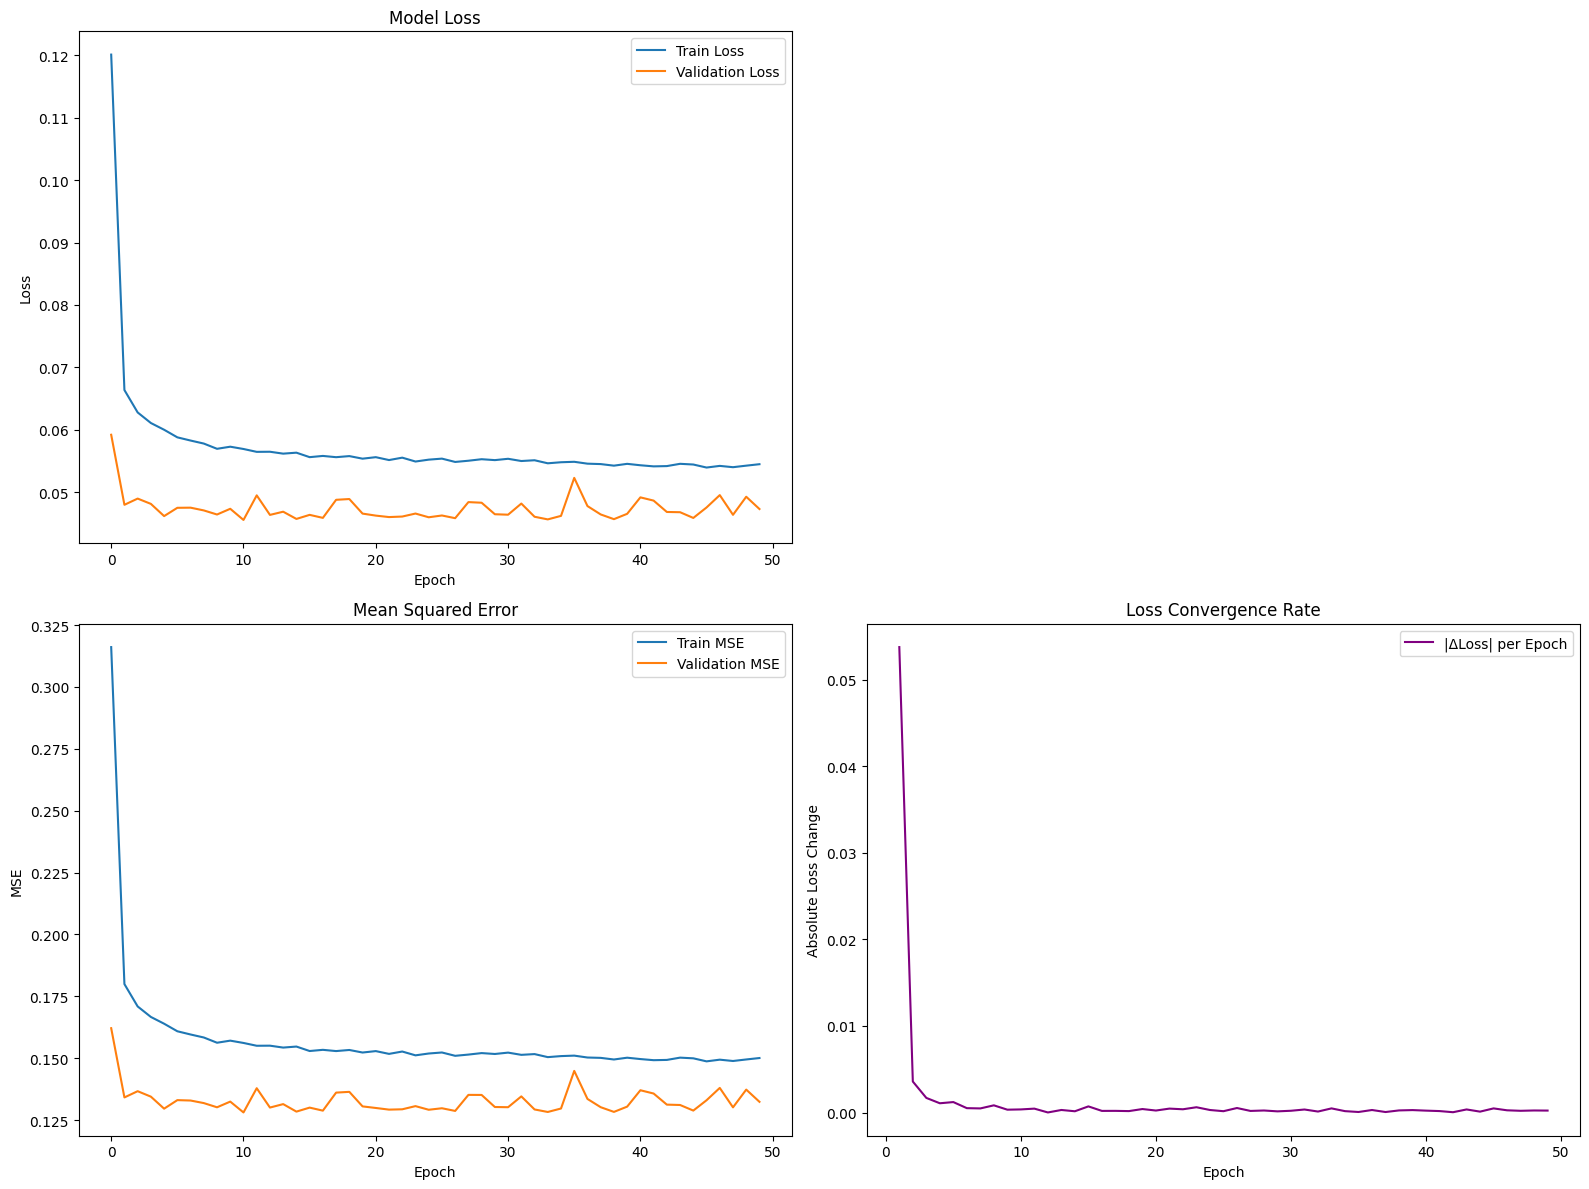

Average epoch-to-epoch loss change (convergence rate): 0.001520


In [ ]:
# Create figure for Loss,MSE
plt.figure(figsize=(16, 12))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(history_sgd.history['loss'], label='Train Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#  Plot MSE
plt.subplot(2, 2, 3)
plt.plot(history_sgd.history['mse'], label='Train MSE')
plt.plot(history_sgd.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot Convergence (Loss Change per Epoch)
losses = history_sgd.history['loss']
loss_change = [abs(losses[i] - losses[i - 1]) for i in range(1, len(losses))]

plt.subplot(2, 2, 4)
plt.plot(range(1, len(losses)), loss_change, label='|ΔLoss| per Epoch', color='purple')
plt.title('Loss Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Absolute Loss Change')
plt.legend()

plt.tight_layout()
plt.show()

# Print Average Convergence Rate
avg_loss_change = sum(loss_change) / len(loss_change)
print(f"Average epoch-to-epoch loss change (convergence rate): {avg_loss_change:.6f}")

In [ ]:
import matplotlib.pyplot as plt
adam=tf.keras.optimizers.Adam(     learning_rate=0.005,
    beta_1=0.92,
    beta_2=0.995,
    epsilon=1e-08)
model_adam = build_model(adam)
history_adam = model_adam.fit(X_train, y_train, batch_size = 64 ,validation_data=(X_test,y_test), epochs=50, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1666 - mse: 0.4798 - val_loss: 0.0511 - val_mse: 0.1421
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0558 - mse: 0.1541 - val_loss: 0.0494 - val_mse: 0.1386
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0543 - mse: 0.1502 - val_loss: 0.0479 - val_mse: 0.1341
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0526 - mse: 0.1456 - val_loss: 0.0460 - val_mse: 0.1292
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0525 - mse: 0.1452 - val_loss: 0.0477 - val_mse: 0.1335
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0515 - mse: 0.1429 - val_loss: 0.0458 - val_mse: 0.1289
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0516 - mse: 0.1430 - val_loss: 0.0473 - val_mse: 0.1325
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0513 - mse: 0.1423 - val_loss: 0.0476 - val_mse: 0.1331
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - lo

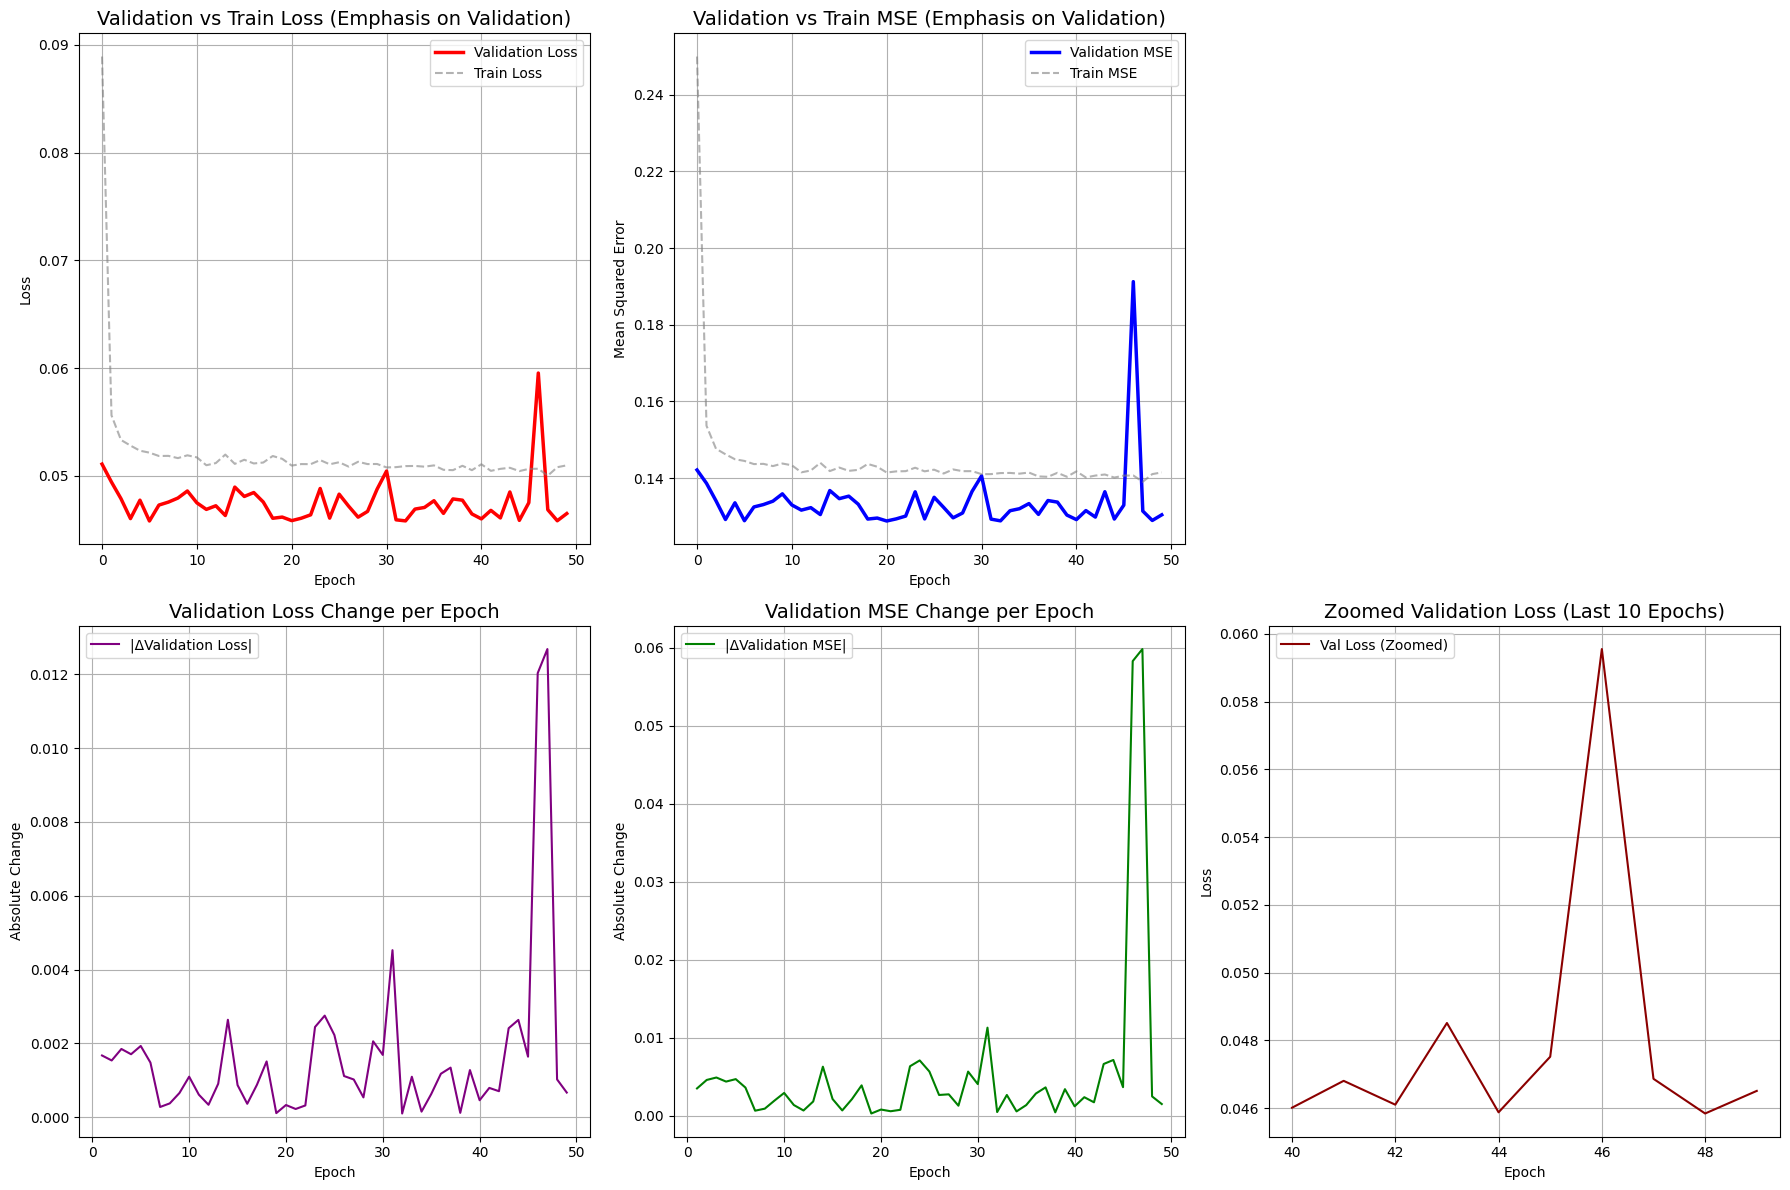

Average validation loss change per epoch: 0.001652
Average validation MSE change per epoch:  0.005294


In [ ]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(18, 12))

# --- 1. Validation vs Train Loss ---
plt.subplot(2, 3, 1)
plt.plot(history_adam.history['val_loss'], label='Validation Loss', color='red', linewidth=2.5)
plt.plot(history_adam.history['loss'], label='Train Loss', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train Loss (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- 2. Validation vs Train MSE ---
plt.subplot(2, 3, 2)
plt.plot(history_adam.history['val_mse'], label='Validation MSE', color='blue', linewidth=2.5)
plt.plot(history_adam.history['mse'], label='Train MSE', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train MSE (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# --- 3. Validation Loss Change per Epoch ---
val_losses = history_adam.history['val_loss']
val_loss_change = [abs(val_losses[i] - val_losses[i - 1]) for i in range(1, len(val_losses))]

plt.subplot(2, 3, 4)
plt.plot(range(1, len(val_losses)), val_loss_change, label='|ΔValidation Loss|', color='purple')
plt.title('Validation Loss Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 4. Validation MSE Change per Epoch ---
val_mse = history_adam.history['val_mse']
val_mse_change = [abs(val_mse[i] - val_mse[i - 1]) for i in range(1, len(val_mse))]

plt.subplot(2, 3, 5)
plt.plot(range(1, len(val_mse)), val_mse_change, label='|ΔValidation MSE|', color='green')
plt.title('Validation MSE Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 5. Zoomed-in Validation Loss (Last 10 Epochs) ---
plt.subplot(2, 3, 6)
plt.plot(range(len(val_losses)-10, len(val_losses)), val_losses[-10:], color='darkred', label='Val Loss (Zoomed)')
plt.title('Zoomed Validation Loss (Last 10 Epochs)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Print Summary Stats ---
avg_val_loss_change = sum(val_loss_change) / len(val_loss_change)
avg_val_mse_change = sum(val_mse_change) / len(val_mse_change)

print(f"Average validation loss change per epoch: {avg_val_loss_change:.6f}")
print(f"Average validation MSE change per epoch:  {avg_val_mse_change:.6f}")


In [ ]:
rms=tf.keras.optimizers.RMSprop(learning_rate=0.01,
    rho=0.9,            # decay factor for moving average of squared gradients
    momentum=0.0,       # try 0.9 if training is too slow
    epsilon=1e-07,
    centered=False      # use True if gradients are very noisy
                                )
model_rms=build_model(rms)
history_rms = model_rms.fit(X_train, y_train, batch_size = 64 ,validation_data=(X_test,y_test), epochs=50, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1896 - mse: 0.5418 - val_loss: 0.0603 - val_mse: 0.1652
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0582 - mse: 0.1599 - val_loss: 0.0478 - val_mse: 0.1344
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0567 - mse: 0.1560 - val_loss: 0.0490 - val_mse: 0.1366
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0562 - mse: 0.1547 - val_loss: 0.0469 - val_mse: 0.1315
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0557 - mse: 0.1535 - val_loss: 0.0474 - val_mse: 0.1328
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0552 - mse: 0.1522 - val_loss: 0.0459 - val_mse: 0.1296
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0553 - mse: 0.1523 - val_loss: 0.0456 - val_mse: 0.1283
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0555 - mse: 0.1529 - val_loss: 0.0515 - val_mse: 0.1428
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

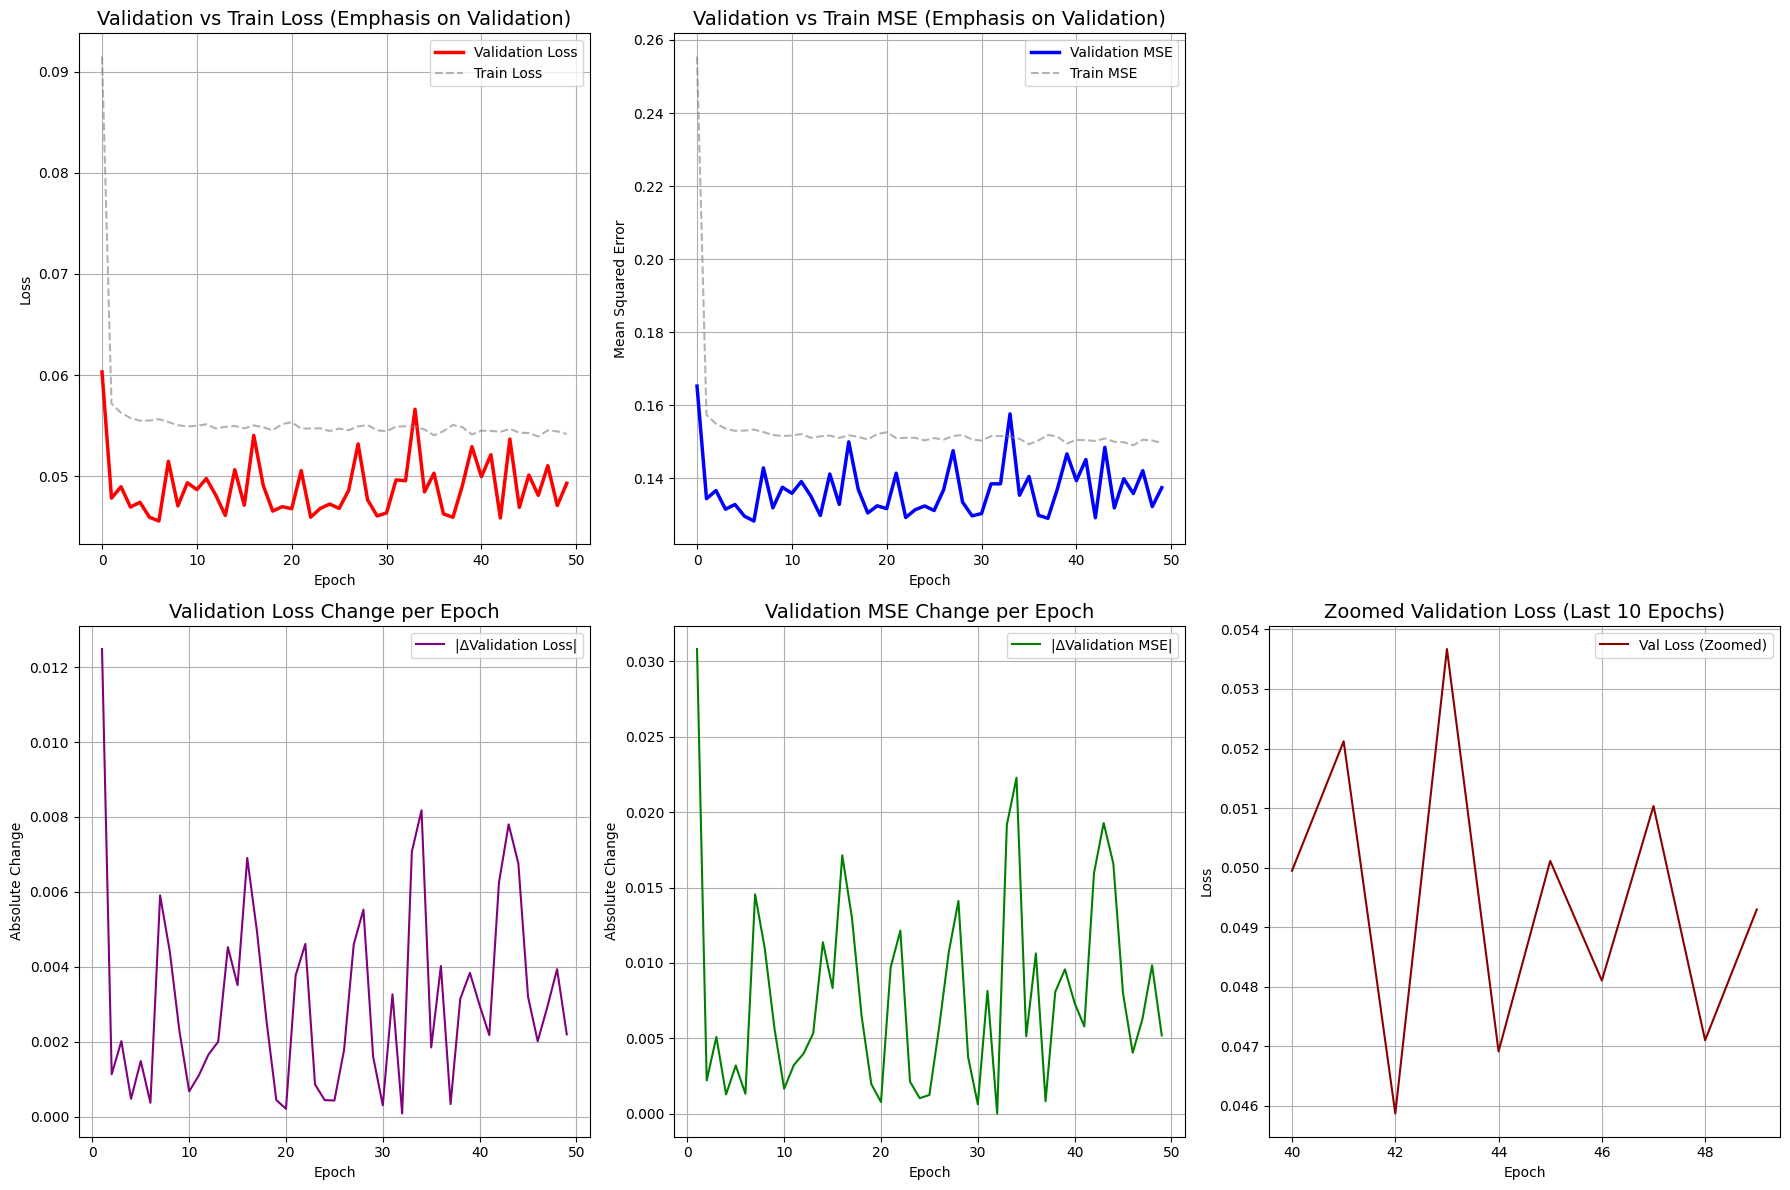

Average validation loss change per epoch: 0.003163
Average validation MSE change per epoch:  0.007990


In [ ]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(18, 12))

# --- 1. Validation vs Train Loss ---
plt.subplot(2, 3, 1)
plt.plot(history_rms.history['val_loss'], label='Validation Loss', color='red', linewidth=2.5)
plt.plot(history_rms.history['loss'], label='Train Loss', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train Loss (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- 2. Validation vs Train MSE ---
plt.subplot(2, 3, 2)
plt.plot(history_rms.history['val_mse'], label='Validation MSE', color='blue', linewidth=2.5)
plt.plot(history_rms.history['mse'], label='Train MSE', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train MSE (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# --- 3. Validation Loss Change per Epoch ---
val_losses = history_rms.history['val_loss']
val_loss_change = [abs(val_losses[i] - val_losses[i - 1]) for i in range(1, len(val_losses))]

plt.subplot(2, 3, 4)
plt.plot(range(1, len(val_losses)), val_loss_change, label='|ΔValidation Loss|', color='purple')
plt.title('Validation Loss Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 4. Validation MSE Change per Epoch ---
val_mse = history_rms.history['val_mse']
val_mse_change = [abs(val_mse[i] - val_mse[i - 1]) for i in range(1, len(val_mse))]

plt.subplot(2, 3, 5)
plt.plot(range(1, len(val_mse)), val_mse_change, label='|ΔValidation MSE|', color='green')
plt.title('Validation MSE Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 5. Zoomed-in Validation Loss (Last 10 Epochs) ---
plt.subplot(2, 3, 6)
plt.plot(range(len(val_losses)-10, len(val_losses)), val_losses[-10:], color='darkred', label='Val Loss (Zoomed)')
plt.title('Zoomed Validation Loss (Last 10 Epochs)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Print Summary Stats ---
avg_val_loss_change = sum(val_loss_change) / len(val_loss_change)
avg_val_mse_change = sum(val_mse_change) / len(val_mse_change)

print(f"Average validation loss change per epoch: {avg_val_loss_change:.6f}")
print(f"Average validation MSE change per epoch:  {avg_val_mse_change:.6f}")


In [ ]:
from tensorflow.keras.optimizers import Adagrad
adagrad= Adagrad(    learning_rate=0.005,              # Slightly higher for better early learning
    initial_accumulator_value=0.1,   # Default and typically fine
    epsilon=1e-7                     # Default, keep for stability
                     )
model_adagrad=build_model(adagrad)
history_adagrad = model_adagrad.fit(X_train, y_train, batch_size = 64 ,validation_data=(X_test,y_test), epochs=50, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4960 - mse: 1.4838 - val_loss: 0.1081 - val_mse: 0.2994
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1973 - mse: 0.5678 - val_loss: 0.0878 - val_mse: 0.2423
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1461 - mse: 0.4110 - val_loss: 0.0768 - val_mse: 0.2117
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1189 - mse: 0.3299 - val_loss: 0.0689 - val_mse: 0.1904
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1037 - mse: 0.2855 - val_loss: 0.0646 - val_mse: 0.1789
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0956 - mse: 0.2608 - val_loss: 0.0616 - val_mse: 0.1708
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0887 - mse: 0.2412 - val_loss: 0.0594 - val_mse: 0.1652
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0833 - mse: 0.2258 - val_loss: 0.0578 - val_mse: 0.1608
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0804 

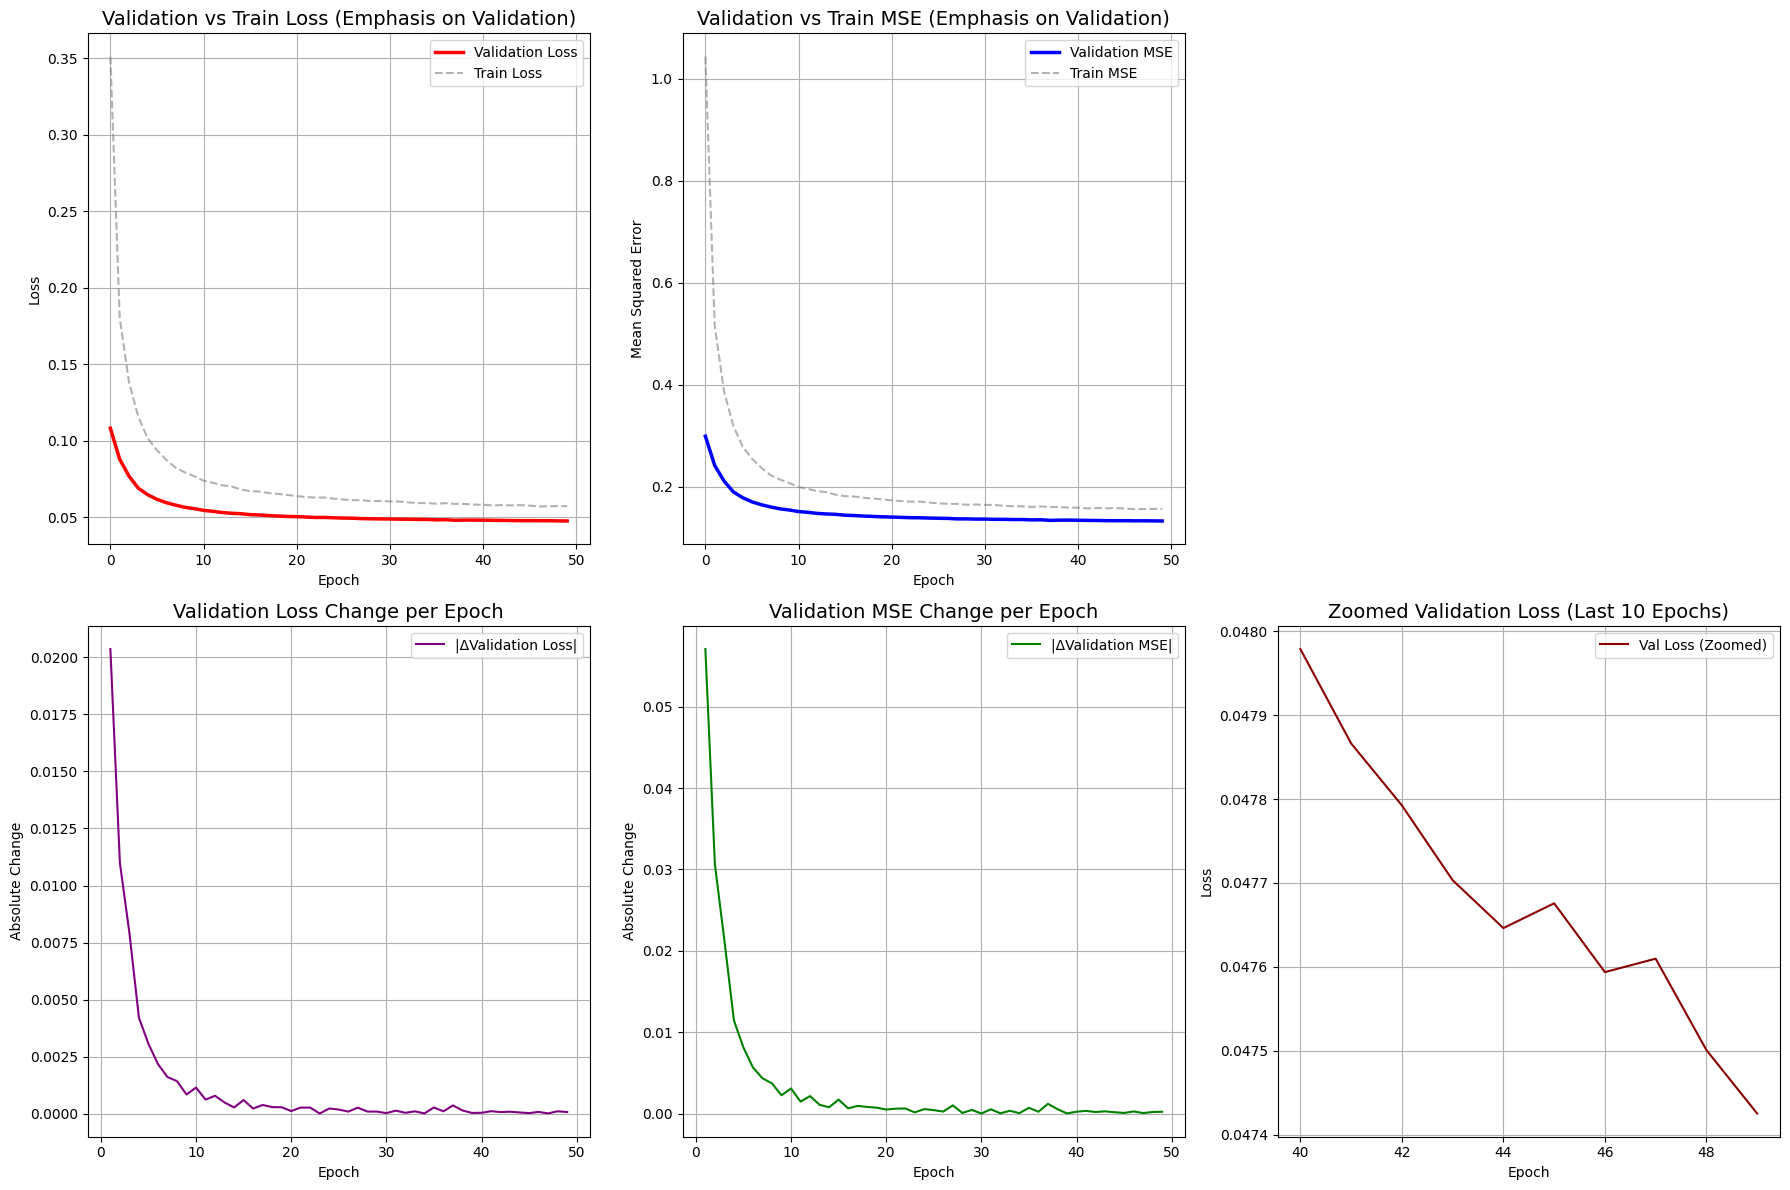

Average validation loss change per epoch: 0.001252
Average validation MSE change per epoch:  0.003431


In [ ]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(18, 12))

# --- 1. Validation vs Train Loss ---
plt.subplot(2, 3, 1)
plt.plot(history_adagrad.history['val_loss'], label='Validation Loss', color='red', linewidth=2.5)
plt.plot(history_adagrad.history['loss'], label='Train Loss', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train Loss (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- 2. Validation vs Train MSE ---
plt.subplot(2, 3, 2)
plt.plot(history_adagrad.history['val_mse'], label='Validation MSE', color='blue', linewidth=2.5)
plt.plot(history_adagrad.history['mse'], label='Train MSE', color='gray', linestyle='--', alpha=0.6)
plt.title('Validation vs Train MSE (Emphasis on Validation)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# --- 3. Validation Loss Change per Epoch ---
val_losses = history_adagrad.history['val_loss']
val_loss_change = [abs(val_losses[i] - val_losses[i - 1]) for i in range(1, len(val_losses))]

plt.subplot(2, 3, 4)
plt.plot(range(1, len(val_losses)), val_loss_change, label='|ΔValidation Loss|', color='purple')
plt.title('Validation Loss Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 4. Validation MSE Change per Epoch ---
val_mse = history_adagrad.history['val_mse']
val_mse_change = [abs(val_mse[i] - val_mse[i - 1]) for i in range(1, len(val_mse))]

plt.subplot(2, 3, 5)
plt.plot(range(1, len(val_mse)), val_mse_change, label='|ΔValidation MSE|', color='green')
plt.title('Validation MSE Change per Epoch', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Absolute Change')
plt.legend()
plt.grid(True)

# --- 5. Zoomed-in Validation Loss (Last 10 Epochs) ---
plt.subplot(2, 3, 6)
plt.plot(range(len(val_losses)-10, len(val_losses)), val_losses[-10:], color='darkred', label='Val Loss (Zoomed)')
plt.title('Zoomed Validation Loss (Last 10 Epochs)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Print Summary Stats ---
avg_val_loss_change = sum(val_loss_change) / len(val_loss_change)
avg_val_mse_change = sum(val_mse_change) / len(val_mse_change)

print(f"Average validation loss change per epoch: {avg_val_loss_change:.6f}")
print(f"Average validation MSE change per epoch:  {avg_val_mse_change:.6f}")
